In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

In [69]:
data = pd.read_csv('CreditCardData.csv')

In [70]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [71]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [72]:
pd.cut(data["Credit_Limit"],4)

0        (9707.725, 17977.15]
1        (1405.222, 9707.725]
2        (1405.222, 9707.725]
3        (1405.222, 9707.725]
4        (1405.222, 9707.725]
                 ...         
10122    (1405.222, 9707.725]
10123    (1405.222, 9707.725]
10124    (1405.222, 9707.725]
10125    (1405.222, 9707.725]
10126    (9707.725, 17977.15]
Name: Credit_Limit, Length: 10127, dtype: category
Categories (4, interval[float64, right]): [(1405.222, 9707.725] < (9707.725, 17977.15] < (17977.15, 26246.575] < (26246.575, 34516.0]]

In [49]:
pd.cut(data["Avg_Utilization_Ratio"],4)

0        (-0.000999, 0.25]
1        (-0.000999, 0.25]
2        (-0.000999, 0.25]
3           (0.749, 0.999]
4        (-0.000999, 0.25]
               ...        
10122          (0.25, 0.5]
10123         (0.5, 0.749]
10124    (-0.000999, 0.25]
10125    (-0.000999, 0.25]
10126    (-0.000999, 0.25]
Name: Avg_Utilization_Ratio, Length: 10127, dtype: category
Categories (4, interval[float64, right]): [(-0.000999, 0.25] < (0.25, 0.5] < (0.5, 0.749] < (0.749, 0.999]]

In [73]:
# Credit Limit Scoring Function
def credit_limit_score_v2(credit_limit):
    if credit_limit > 20000:
        return 3
    elif credit_limit > 10000:
        return 2
    elif credit_limit > 5000:
        return 1
    else:
        return 0

# Avg Utilization Ratio Scoring Function
def utilization_score_v2(utilization):
    if utilization < 0.1:
        return 3
    elif utilization < 0.3:
        return 2
    elif utilization < 0.5:
        return 1
    else:
        return 0

# Income Category Scoring Function
def income_score_v2(income):
    if income == '$120K +':
        return 3
    elif income in ['$80K - $120K', '$60K - $80K']:
        return 2
    elif income == '$40K - $60K':
        return 1
    elif income == 'Less than $40K':
        return 0
    else:  # Handling 'Unknown'
        return 1.5

# Applying the scoring functions to each customer
data['Credit_Limit_Score'] = data['Credit_Limit'].apply(credit_limit_score_v2)
data['Utilization_Score'] = data['Avg_Utilization_Ratio'].apply(utilization_score_v2)
data['Income_Score'] = data['Income_Category'].apply(income_score_v2)

# Calculating the total score
data['Total_Score_V2'] = data[['Credit_Limit_Score', 'Utilization_Score', 'Income_Score']].sum(axis=1)

# Categorizing based on the total score
def categorize_customer_v2(score):
    if score >= 8:
        return 'Super-Prime'
    elif score >= 6:
        return 'Prime'
    elif score >= 3:
        return 'Near-Prime'
    else:
        return 'Subprime'

data['Customer_Category'] = data['Total_Score_V2'].apply(categorize_customer_v2)

# Checking the distribution of the new categories
category_distribution_v2 = data['Customer_Category'].value_counts()
category_distribution_v2


Near-Prime     3839
Subprime       3579
Prime          1539
Super-Prime    1170
Name: Customer_Category, dtype: int64

In [74]:
data['Customer_Category'].value_counts()

Near-Prime     3839
Subprime       3579
Prime          1539
Super-Prime    1170
Name: Customer_Category, dtype: int64

In [75]:
# calculate interest rate for each customer based on customer category
# https://www.forbes.com/advisor/credit-cards/average-credit-card-interest-rate/

def Calc_interest_rate(Customer_Category):
    if Customer_Category == 'Super-Prime':
        return 0.18/12
    elif Customer_Category == 'Prime':
        return 0.22/12
    elif Customer_Category == 'Near-Prime':
        return 0.24/12
    else:
        return 0.28/12

In [76]:
data["Interest_Rate_monthly"] = data["Customer_Category"].apply(Calc_interest_rate)

In [77]:
# calculate annual fee for each customer 
def Calc_monthly_fee(Card_Category):
    if Card_Category == 'Blue':
        return 0
    elif Card_Category == 'Silver':
        return 150/12
    elif Card_Category == 'Gold':
        return 450/12
    else:
        return 695/12

In [78]:
data["Card_Fee_Monthly"] = data["Card_Category"].apply(Calc_monthly_fee)

In [82]:
data["Card_Fee_Monthly"].dtype

dtype('float64')

In [79]:
#Late Fee for each customer
# https://www.cnbc.com/select/why-deep-subprime-borrowers-incur-more-interest/
def Calc_Late_Fee(Customer_Category):
    if Customer_Category == 'Super-Prime':
        return 1323/38
    elif Customer_Category == 'Prime':
        return 1983/41
    elif Customer_Category == 'Near-Prime':
        return 2407/44
    else:
        return 2676/45

In [80]:
data["Late_Fee_Monthly"] = data["Customer_Category"].apply(Calc_Late_Fee)

In [81]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_Score,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,2,3,2.0,7.0,Prime,0.018333,0.0,48.365854
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,1,2,0.0,3.0,Near-Prime,0.020000,0.0,54.704545
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,0,0,0.0,0.0,Subprime,0.023333,0.0,59.466667
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545


In [84]:
data["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [87]:
#calculate Revenue
data["Monthy_Revenue"] = (data["Interest_Rate_monthly"] * data["Total_Revolving_Bal"]) + data["Card_Fee_Monthly"] + data["Late_Fee_Monthly"]


In [88]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit_Score,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly,Revenue,Monthy_Revenue
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,2,3,2.0,7.0,Prime,0.018333,0.0,48.365854,62.610854,62.610854
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,0.0,3.0,Near-Prime,0.020000,0.0,54.704545,71.984545,71.984545
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,54.704545
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0,0,0.0,0.0,Subprime,0.023333,0.0,59.466667,118.196667,118.196667
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,54.704545


In [60]:
# Encode the target variable 'Attrited_Flag'
encoder = LabelEncoder()
data['Attrition_Flag'] = encoder.fit_transform(data['Attrition_Flag'])


In [61]:
data['Attrition_Flag'] = encoder.fit_transform(data['Attrition_Flag'])
data["Education_Level"] = encoder.fit_transform(data['Education_Level'])
data["Gender"] = encoder.fit_transform(data["Gender"])
data["Marital_Status"] = encoder.fit_transform(data["Marital_Status"])
data['Income_Category'] = encoder.fit_transform(data['Income_Category'])
data['Card_Category'] = encoder.fit_transform(data['Card_Category'])

In [62]:
# Prepare the features (X) and the target (y)
X = data.drop(['Attrition_Flag','CLIENTNUM'], axis=1)  # Drop other non-feature columns as necessary
y = data['Attrition_Flag']

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [65]:
# Train the model
rf_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Near-Prime'

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_pred.value_counts()

1    2602
0     437
dtype: int64

In [ ]:
y_pred_proba = pd.DataFrame(y_pred_proba)
y_pred_proba

,0
0,1.00
1,1.00
2,0.99
3,0.99
4,0.92
...,...
3034,1.00
3035,1.00
3036,1.00
3037,0.98


In [ ]:
for x,y in zip(X.columns, rf_model.feature_importances_):
    print(f"{x} : {y}")

Customer_Age : 0.03485902915010776
Gender : 0.010269691439715407
Dependent_count : 0.011994326975582904
Education_Level : 0.011858040420624109
Marital_Status : 0.008492815014359459
Income_Category : 0.011066594700203554
Card_Category : 0.0019880482951178243
Months_on_book : 0.024660619740520973
Total_Relationship_Count : 0.06121062793646481
Months_Inactive_12_mon : 0.023908121867380887
Contacts_Count_12_mon : 0.025352444763242426
Credit_Limit : 0.031887215336774494
Total_Revolving_Bal : 0.10547388056126127
Avg_Open_To_Buy : 0.031303617622418484
Total_Amt_Chng_Q4_Q1 : 0.05958010936443484
Total_Trans_Amt : 0.19994577653140175
Total_Trans_Ct : 0.1719175759313364
Total_Ct_Chng_Q4_Q1 : 0.10857358817655453
Avg_Utilization_Ratio : 0.06565787617249817


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print performance metrics
print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.9608423823626193
ROC-AUC: 0.989981194423655


In [ ]:
# Get probability predictions for all instances
probabilities = rf_model.predict_proba(X)
probabilities = pd.DataFrame(probabilities)

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data_new = pd.concat((data,probabilities[1]),axis=1)

In [ ]:
data_new

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,1
0,768805383,1,45,1,3,3,1,2,0,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1.00
1,818770008,1,49,0,5,2,2,4,0,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.99
2,713982108,1,51,1,3,2,1,3,0,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.87
3,769911858,1,40,0,4,3,3,4,0,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.89
4,709106358,1,40,1,3,5,1,2,0,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1.00
10123,710638233,0,41,1,2,6,0,1,0,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.69
10124,716506083,0,44,0,1,3,1,4,0,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.03
10125,717406983,0,30,1,2,2,3,1,0,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.26


In [ ]:
data_new.to_csv('survival.csv', index=False)

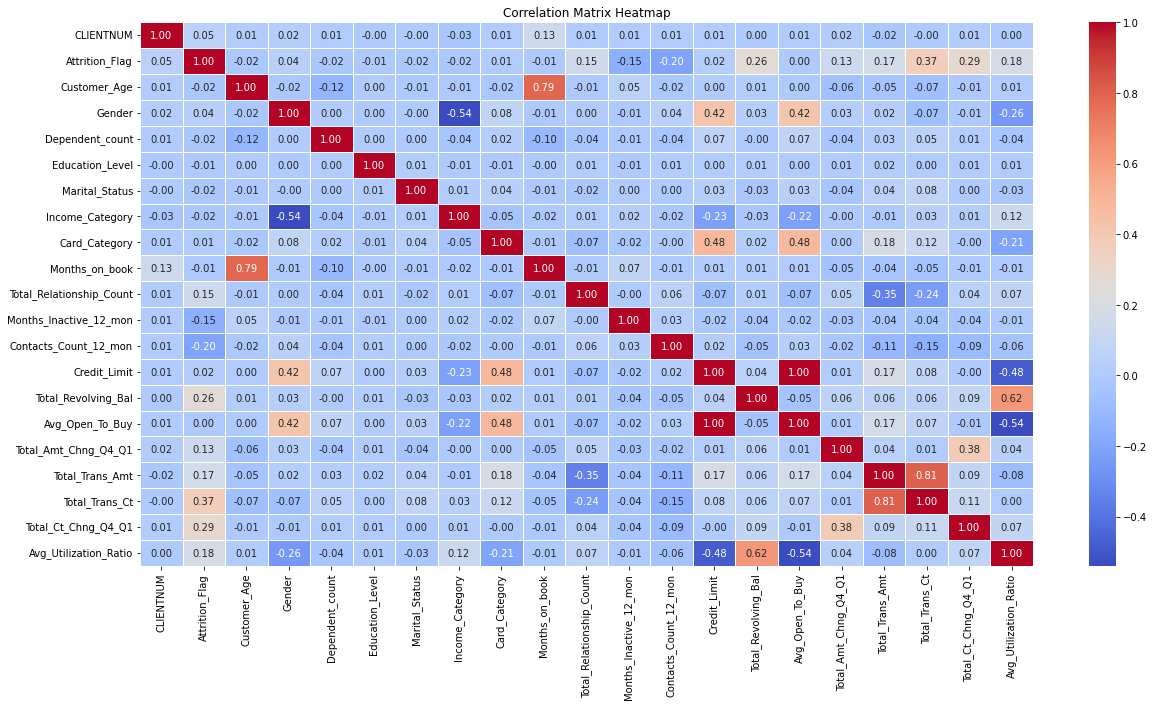

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust the size as needed
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
plt.hist()